In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<AxesSubplot:>

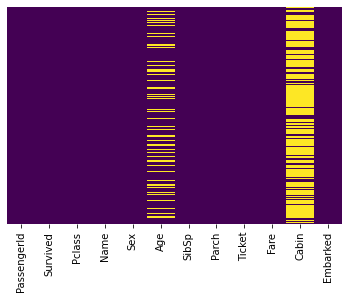

In [6]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age, Cabin and Embarked columns have missing values. We need to either impute or drop them to continue our analysis.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Newell, Mr. Arthur Webster",male,347082,B96 B98,S
freq,1,577,7,4,644


# Handling Missing Values

## 1. Cabin Column

In [10]:
display(len(df['Cabin']),df['Cabin'].nunique())

891

147

Remarks: Since alot of the cabin information is missing we can drop this column

## 2. Embarked Column

In [11]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Let's check the distribution of this column

<AxesSubplot:>

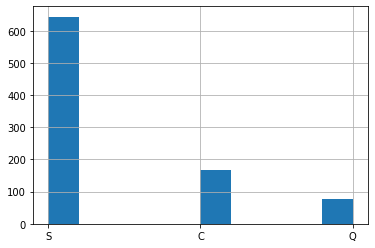

In [12]:
df['Embarked'].hist()

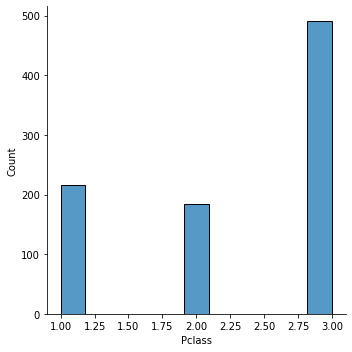

In [13]:
sns.displot(df['Pclass'],kde=False)

There are too few missing values, let's just simply impute them with median.

## 3. Age

It is understood that the age plays a great role in defining the financial status. We know that the averges of the ages would be different for different classes. Let's build a function that will impute the missing age value based on the class average.

In [14]:
print(df[df['Pclass'] == 1]['Age'].mean())
print(df[df['Pclass'] == 2]['Age'].mean())
print(df[df['Pclass'] == 3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [15]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return df.groupby('Pclass').mean()['Age'].loc[Pclass]
        elif Pclass == 2:
            return df.groupby('Pclass').mean()['Age'].loc[Pclass]
        else:
            return df.groupby('Pclass').mean()['Age'].loc[Pclass]
    else:
        return Age

In [16]:
df[['Age','Pclass']].apply(impute_age,axis=1)

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Length: 891, dtype: float64

Great! missing values are sucessfully handled.

# Data Preprocessing

Firstly, we will automate all of our work with a single tranformer taking care of everything.

This process will start by sorting the index of numerical and categorical features. Also, let's drop the columns that are of no good use for us.

In [17]:
y=df['Survived'].copy()
drop_columns=['PassengerId','Name','Ticket','Cabin','Survived']
df.drop(drop_columns,axis=1,inplace=True)
#now let us create a datapipeline to automate our work
#first we need to take care of categorical and numeric features
cat_features=df.select_dtypes('object')
cat_features_index=[]
num_features_index=[]
for col in cat_features.columns:
    cat_features_index.append(df.columns.get_loc(col))
for col in df.columns:
    if not col in cat_features.columns:
        num_features_index.append(df.columns.get_loc(col))

In [18]:
#let's build a custom feature selector that seprates num and cat features
from sklearn.base import TransformerMixin, BaseEstimator
class feature_selector(BaseEstimator,TransformerMixin):
    def __init__(self,features_index):
        self.features_index=features_index
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X.iloc[:,self.features_index]

In [19]:
#now to let's wrap cat transformation into neat pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
cat_pipeline=Pipeline(steps=[('cat_feature_selector',feature_selector(cat_features_index)),
                             ('imputer',SimpleImputer(strategy='most_frequent')),
                             ('encoder',OneHotEncoder(sparse=False,categories='auto'))
])

Now let's handle the Numerical Features.

In [20]:
class num_transformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def impute_age(self,cols):
        Pclass=cols[0]
        Age=cols[1]
        if pd.isnull(Age):
            if Pclass == 1:
                return np.round(38.233440860215055)
            elif Pclass == 2:
                return np.round(29.87763005780347)
            else:
                return np.round(25.14061971830986)
        else:
            return Age
    def transform(self,X,y=None):
        X=X.copy()
        X.iloc[:,1]=X.iloc[:,:2].apply(self.impute_age,axis=1)
        return X.values

Now let's build a pipeline for numerical transforamtion.

In [21]:
num_pipeline=Pipeline(steps=[('num_feature_selector',feature_selector(num_features_index)),
                             ('num_transformer',num_transformer()),
                             ('Imputer',SimpleImputer(strategy='median')),
                             ('Scalar',StandardScaler())
    
])

In [22]:
#now let's combine the two pipeline into one clean looking pipeline
from sklearn.pipeline import FeatureUnion
full_pipeline=FeatureUnion(transformer_list=[('cat_pipeline',cat_pipeline),
                                             ('num_pipeline',num_pipeline),
    
])

Before we proceed, let's build a validation set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid=train_test_split(df,y,test_size=0.15,stratify=y,random_state=2)

# Training the Model

So far we have sucessfully built a pipeline to preprocess the data. Now, it is time to train the model.

Let's firstly apply the transformation to our data.

In [24]:
X_train=full_pipeline.fit_transform(X_train)
X_valid=full_pipeline.fit_transform(X_valid)

Let's start from simpler model i.e Logistic Regression.

### 1. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report

In [26]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_valid)

In [27]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        83
           1       0.76      0.75      0.75        51

    accuracy                           0.81       134
   macro avg       0.80      0.80      0.80       134
weighted avg       0.81      0.81      0.81       134



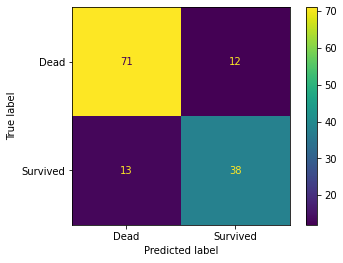

In [28]:
plot_confusion_matrix(log_reg,X_valid,y_valid,display_labels=['Dead','Survived'])

Not a bad performance. Model has perform quite good here, only 25 wrong predictions have been made out of 134 which is impressive.

### 2. Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
tree_clf=RandomForestClassifier()
tree_clf.fit(X_train,y_train)

RandomForestClassifier()

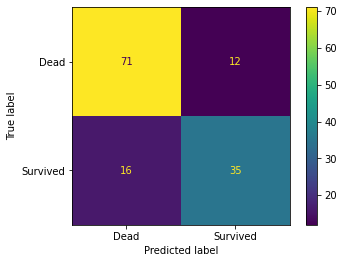

In [31]:
plot_confusion_matrix(tree_clf,X_valid,y_valid,display_labels=['Dead','Survived'])

Surprisingly, it did not outperform the logistic regression. However, we should be too judgemental, let us wait to see how it performs after fine tuning.

### 3. Xgboost

In [32]:
import xgboost as xgb

In [58]:
#let's first try a very basic one and later we will tune the hyperparameters
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',use_label_encoder=False,seed=42,eval_metric='logloss')
clf_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_set=[(X_valid,y_valid)])

[0]	validation_0-logloss:0.57174
[1]	validation_0-logloss:0.50713
[2]	validation_0-logloss:0.47202
[3]	validation_0-logloss:0.45016
[4]	validation_0-logloss:0.44211
[5]	validation_0-logloss:0.43933
[6]	validation_0-logloss:0.44467
[7]	validation_0-logloss:0.44711
[8]	validation_0-logloss:0.45198
[9]	validation_0-logloss:0.45644
[10]	validation_0-logloss:0.46217
[11]	validation_0-logloss:0.45925
[12]	validation_0-logloss:0.46183
[13]	validation_0-logloss:0.46071
[14]	validation_0-logloss:0.46355
[15]	validation_0-logloss:0.46085


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

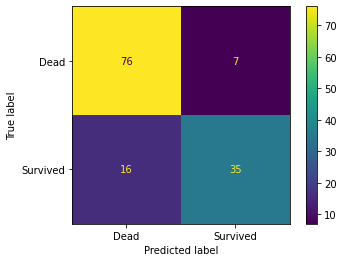

In [59]:
plot_confusion_matrix(clf_xgb,X_valid,y_valid,display_labels=['Dead','Survived'])

Great! There's a room to improve the model more by fine tuning.

### 4. Support Vector Machines

Let's try our one last algorithm. 

In [35]:
from sklearn.svm import SVC

In [86]:
svc=SVC(probability=True)
svc.fit(X_train,y_train)

SVC(probability=True)

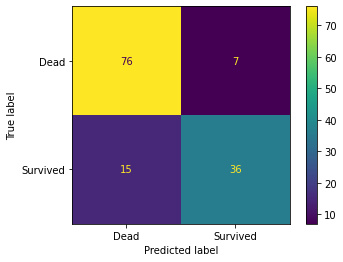

In [37]:
plot_confusion_matrix(svc,X_valid,y_valid,display_labels=['Dead','Survived'])

### 5. Neural Networks

This I promised is the last to check algorithm :)

In [38]:
from tensorflow import keras

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [40]:
model=Sequential()
model.add(Dense(10,activation='elu',kernel_initializer="he_normal"))
model.add(Dense(10,activation='elu',kernel_initializer="he_normal"))
model.add(Dense(5,activation='elu',kernel_initializer="he_normal"))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
early_stop=EarlyStopping(patience=10)

In [42]:
history=model.fit(X_train,y_train,epochs=150,validation_data=(X_valid,y_valid),callbacks=[early_stop],verbose=1)

Epoch 1/150
24/24 [==============================] - 1s 29ms/step - loss: 0.7947 - accuracy: 0.6038 - val_loss: 0.7337 - val_accuracy: 0.5970
Epoch 2/150
24/24 [==============================] - 0s 5ms/step - loss: 0.6820 - accuracy: 0.6027 - val_loss: 0.6300 - val_accuracy: 0.6567
Epoch 3/150
24/24 [==============================] - 0s 5ms/step - loss: 0.6046 - accuracy: 0.6786 - val_loss: 0.5778 - val_accuracy: 0.7164
Epoch 4/150
24/24 [==============================] - 0s 5ms/step - loss: 0.5300 - accuracy: 0.7529 - val_loss: 0.5382 - val_accuracy: 0.7388
Epoch 5/150
24/24 [==============================] - 0s 5ms/step - loss: 0.5247 - accuracy: 0.7323 - val_loss: 0.5104 - val_accuracy: 0.7463
Epoch 6/150
24/24 [==============================] - 0s 5ms/step - loss: 0.5008 - accuracy: 0.7754 - val_loss: 0.4888 - val_accuracy: 0.7985
Epoch 7/150
24/24 [==============================] - 0s 4ms/step - loss: 0.4680 - accuracy: 0.7936 - val_loss: 0.4722 - val_accuracy: 0.7836
Epoch 8/150


<AxesSubplot:>

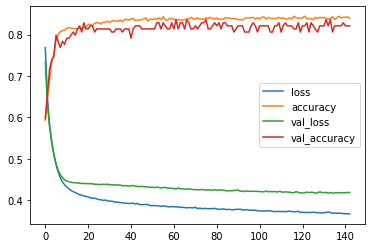

In [43]:
pd.DataFrame(history.history).plot()

In [44]:
y_pred=model.predict_classes(X_valid)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid,y_pred)

array([[76,  7],
       [17, 34]])

### Conclusion

So far, we have tested 5 popular algorithm for classification tasks. Let's arrange them according to their performance: SVC has performed magical with lowest number of misclassified classes which are 22. The second is a tie between logistic regression and xgboost and Neural Networks with 25 misclassified classes. Random forest is the last with 28 misclassified classes. However, these performance have been obtained only before fine tuning. Maybe after fine tuning, the results get change. Let's see who is the correct winner.

## Fine Tuning

Let's see if we can get more performace boost by xgboost (No pun intended)

#### Tuning XGboost

In [60]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid_1={'max_depth':[3,4,5],
              'learning_rate':[0.5,0.1,0.01],
              'gamma':[1.0,2.0,3.0],
              'reg_lambda':[0,1,10],
              'scale_pos_weight':[0.1,0.5,1]}

In [64]:
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42,eval_metric='logloss',subsample=0.9,colsample_bytree=0.5,use_label_encoder=False)

In [69]:
grid_search=GridSearchCV(clf_xgb,param_grid_1,scoring='roc_auc',cv=3)

In [70]:
grid_search.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_valid,y_valid)],verbose=False)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                           

In [71]:
grid_search.best_params_

{'gamma': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lambda': 1,
 'scale_pos_weight': 0.5}

Seems Reasonable.

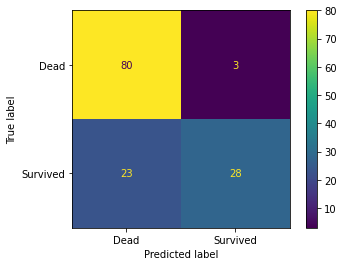

In [72]:
plot_confusion_matrix(grid_search,X_valid,y_valid,display_labels=['Dead','Survived'])

the Model has become more sensitive towards classifying the casulaties correctly. Let's see if that is the desired characterstic we want

In [73]:
y_train.sum()/len(y_train)

0.3844121532364597

We have more classes with casualities, so a model more sensitive to predicting casualties wouldn't be a bad choice.

In [74]:
from copy import deepcopy
clf_xgb=deepcopy(grid_search)

#### Tuning SCV

In [87]:
param_grid_1 = {'C': [0.01,0.1,1,2],  
              'gamma': [1,0.1,0.01, 0.001, 0.0001], 
              'kernel': ['rbf',]}

In [88]:
grid_search=GridSearchCV(svc,param_grid_1,scoring='accuracy',cv=3)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 2],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [89]:
svc=deepcopy(grid_search)

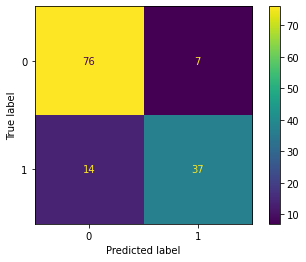

In [90]:
plot_confusion_matrix(svc,X_valid,y_valid)

Almost same. 

Before we wrap up everything, let's see if we can build a soft bagging classifier using xgboost and Svc.

In [91]:
from sklearn.ensemble import VotingClassifier

In [92]:
clf=VotingClassifier(estimators=[('xgb',clf_xgb),('svc',svc)],voting='soft')

In [93]:
clf.fit(X_train,y_train)

VotingClassifier(estimators=[('xgb',
                              GridSearchCV(cv=3,
                                           estimator=XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=0.5,
                                                                   eval_metric='logloss',
                                                                   gamma=None,
                                                                   gpu_id=None,
                                                                   importance_type='gain',
                                                                   interaction_constraints=None,
                                          

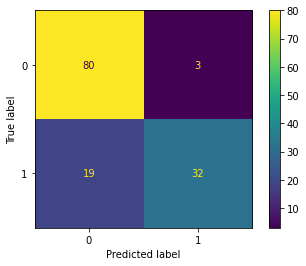

In [94]:
plot_confusion_matrix(clf,X_valid,y_valid)

Impressive! This seems like almost the best performace we can extract from the model.

Before making the submission, let's train the model on the entire dataset.

In [96]:
X=full_pipeline.fit_transform(df)

In [97]:
clf.fit(X,y)

VotingClassifier(estimators=[('xgb',
                              GridSearchCV(cv=3,
                                           estimator=XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=0.5,
                                                                   eval_metric='logloss',
                                                                   gamma=None,
                                                                   gpu_id=None,
                                                                   importance_type='gain',
                                                                   interaction_constraints=None,
                                          

# Predictions on Test Set

In [98]:
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [101]:
test_df.drop(drop_columns[:-1],axis=1,inplace=True)

In [102]:
X_test=full_pipeline.transform(test_df)

In [103]:
predictions=clf.predict(X_test)

In [112]:
submission=pd.DataFrame(columns=['PassengerId'],data=np.arange(892,1310))

In [113]:
submission['Survived']=predictions

In [114]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [115]:
submission.to_csv('Predictions.csv')